In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 모델 튜닝 - 하이퍼 파라미터 튜닝

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(X_train, y_train) # 훈련된 data가 sgd로 반환이 됨
sgd.score(X_test, y_test)

0.8333333333333334

In [4]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', random_state = 42)
sgd.fit(X_train, y_train) # 훈련된 data가 sgd로 반환이 됨
sgd.score(X_test, y_test)

0.9385964912280702

In [5]:
# 정확도가 높다고 좋은게 아님 
# - train 데이터에만 정확도가 높다 - 과적합
# 하이퍼 파라미터만 바뀌어도 정확도를 높일 수 있다.
# 검증세트 만들기 - train, 검증, test

### 검증세트 활용

In [6]:
cancer = load_breast_cancer()

X_train_all, X_test, y_train_all, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, test_size = 0.2,
                                                    random_state = 42)

In [7]:
# 검증데이터 생성 
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, 
                                                    stratify = y_train_all, test_size = 0.2,
                                                    random_state = 42)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(X_train, y_train) # 훈련된 data가 sgd로 반환이 됨
sgd.score(X_test, y_test)

0.6929824561403509

In [9]:
# 교차 검증
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
# k-Fold k: 분할하는 개수 -> 모델의 정확도 보다는 일반화 성질을 보는 것. : 모델 자체 성능보다는 일반화 성능
from sklearn.linear_model import LogisticRegression

# 교차 검증은 train, test 나누는것이 아니라 data 전체를 가지고 온다.
# k - Fold : k - cv(5개분할 - default)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

logistic = LogisticRegression(random_state = 42)
sgd = SGDClassifier(loss = 'log', random_state = 42)

scores  = cross_val_score(logistic, X, y)
scores 

array([0.92982456, 0.93859649, 0.95614035, 0.92105263, 0.95575221])

In [10]:
print('교차검증 평균 점수 : {:.2f}'.format(scores .mean()))

교차검증 평균 점수 : 0.94


In [11]:
# 다중 평가지표 : cross_validate(), 분할마다 훈련과 데스트에 걸린 시간과 설정에 따라 
#                                   훈련데이터와 데스트데이터 점수도 얻을 수 있다.
from sklearn.model_selection import cross_validate
res = cross_validate(logistic, X, y, return_train_score = True)
res

{'fit_time': array([0.04399872, 0.02966571, 0.03125024, 0.03124905, 0.03125   ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.92982456, 0.93859649, 0.95614035, 0.92105263, 0.95575221]),
 'train_score': array([0.95164835, 0.94505495, 0.94505495, 0.95164835, 0.94736842])}

#### pip install mglearn :  이 라이브러리는 그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 이 책을 위해 만든 유틸리티 함수들

In [12]:
import pandas as pd
import mglearn
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.043999,0.0,0.929825,0.951648
1,0.029666,0.0,0.938596,0.945055
2,0.031250,0.0,0.956140,0.945055
3,0.031249,0.0,0.921053,0.951648
4,0.031250,0.0,0.955752,0.947368


평균 시간과 점수 : 
 fit_time       0.033483
score_time     0.000000
test_score     0.940273
train_score    0.948155
dtype: float64


In [13]:
import warnings
warnings.filterwarnings('ignore')

scores  = cross_val_score(logistic, X, y, cv = 3) # 3개로 분할
scores

array([0.93157895, 0.96842105, 0.93121693])

In [14]:
print('교차검증 평균 점수 : {:.2f}'.format(scores .mean()))
# 모델을 평가한 것이 아니라 일반화 평가의 의미

교차검증 평균 점수 : 0.94


### 일반화, 과대적합, 과소적합

In [15]:
# 시각화 한글 처리
import matplotlib as mpl

# 폰트 설정
mpl.rc('font', family = 'NanumGothic')

# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

X.shape :(26, 2)


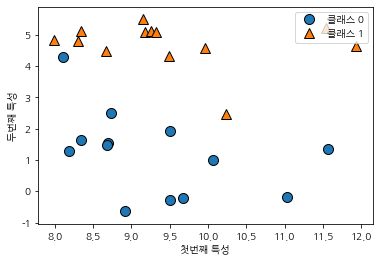

In [16]:
X, y = mglearn.datasets.make_forge()

# 산점도 그래프
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc = 1)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape :{}'.format(X.shape))
# 데이터 샘플이 26개, 특성이 2개

### Knn(최근접 이웃)
- 가장 간단한 머신러닝 알고리즘
- 훈련데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부이다
- 훈련데이터 샘플 하나를 최근접 이웃으로 찾아 예측에 사용한다.

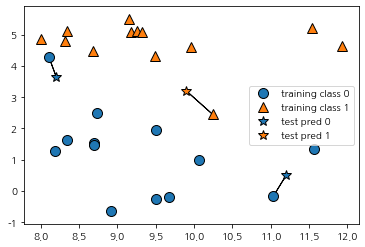

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)
# 별모양이 샘플

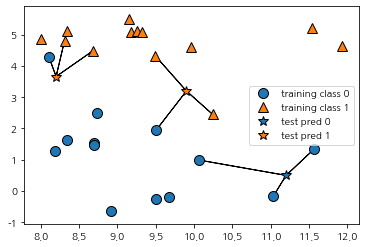

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)
# 별(샘플)이 가장 많은 쪽으로 바뀜.

In [19]:
# train과 test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print('테스트 데이터 예측 : {}'.format(clf.predict(X_test)))

테스트 데이터 예측 : [1 0 1 0 1 0 0]


In [23]:
print('테스트 데이터 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))
# 모델의 정확도 ( 모든 샘플 중에 86프로 예측 ) - 적은 데이터 (train, test로 나누긴 너무 적음)

테스트 데이터 정확도 : 0.86


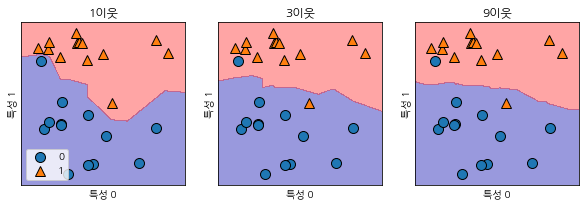

In [24]:
# 결정 경계(decision boundary) : 각각의 클래스로 지정한 영역을 나누는 경계
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

# 이웃이 많으면 어떨까 -> 결정경계를 통해

# 이웃의 수 1, 3, 9 시각화
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc = 3)
# 경계선 부드러워졌다 -> 모델이 단순화 되었다.
# 이웃이 적어지면 -> 복잡도가 높아진다.

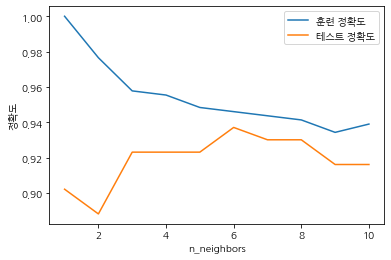

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, 
                                                    random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 모델생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련데이터 정확도
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [26]:
# 강사님 생각은 9정도가 적당할거 같다.

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.0.0'

### 난수 생성

In [29]:
# 균일분포(uniform) : 최소값과 최대값 사이의 모든 수가 나올 확률이 동일
# 정규분표(normal) : 평균과 표준편차
rand = tf.random.uniform([1], 0, 1) # shape, 최소값, 최대값
rand

<tf.Tensor: id=6, shape=(1,), dtype=float32, numpy=array([0.08873808], dtype=float32)>

In [30]:
rand = tf.random.normal([1], 0, 1) # shape, 평균, 표준편차
rand # 1차원에 0에서 1까지

<tf.Tensor: id=12, shape=(1,), dtype=float32, numpy=array([0.6288663], dtype=float32)>

In [31]:
rand = tf.random.uniform([4], 0, 1)
rand

<tf.Tensor: id=19, shape=(4,), dtype=float32, numpy=array([0.6503819 , 0.02632689, 0.47055054, 0.70447063], dtype=float32)>

In [32]:
rand = tf.random.normal([4], 0, 1)
rand

<tf.Tensor: id=25, shape=(4,), dtype=float32, numpy=array([0.62153125, 0.42114335, 0.51071155, 0.11301773], dtype=float32)>

### 뉴런 - 로지스틱 회귀모형

In [33]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [34]:
# y = ax + b
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
output

0.5079464693549162

In [35]:
# 경사하강법 : w에 입력과 학습률과 에러를 곱한 값을 더해주는 것.
# 학습률을 w 업데이트한다.
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 90:
        print(i, error, output)

90 -0.11184536318843588 0.11184536318843588
190 -0.054934617041278326 0.054934617041278326
290 -0.03599451372630569 0.03599451372630569
390 -0.02667538242070307 0.02667538242070307
490 -0.021158654675575466 0.021158654675575466
590 -0.017519576047007598 0.017519576047007598
690 -0.014942031560926312 0.014942031560926312
790 -0.013022040541816769 0.013022040541816769
890 -0.011537200156929142 0.011537200156929142
990 -0.01035494501175506 0.01035494501175506


In [36]:
# 만약 입력 값이 0이 들어오고, 출력으로 1을 얻는 신경망을 생성한다면?
# 편형(bias) = 절편, 보편적으로 1을 사용
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)
for i in range(1000):
    output = sigmoid(x * w + b) # 변화를 보기위하여 의도적으로 만듬.
    error = y - output
    w = w + x * 0.1 * error # 0.1은 learning_rate
    b = b + 1 * 0.1 * error # 0.1은 learning_rate
    
    if i % 100 == 90:
        print(i, error, output)
# 출력, err 값이 변하지 않는다 : 입력값을 0으로 놓았기 때문
# 이런것을 방지 하기 위해 절편을 사용.

90 0.13045365735602177 0.8695463426439782
190 0.05938432457513354 0.9406156754248665
290 0.037892991609008275 0.9621070083909917
390 0.02771433360448261 0.9722856663955174
490 0.021810806991741094 0.9781891930082589
590 0.01796599091924722 0.9820340090807528
690 0.015266425069276335 0.9847335749307237
790 0.013268242737582203 0.9867317572624178
890 0.011730296849723154 0.9882697031502768
990 0.010510418672454835 0.9894895813275452


### k-NN 최근접 이웃 알고리즘의 회귀문제

Text(0, 0.5, '타겟')

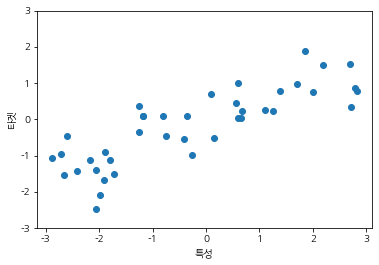

In [37]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타겟')

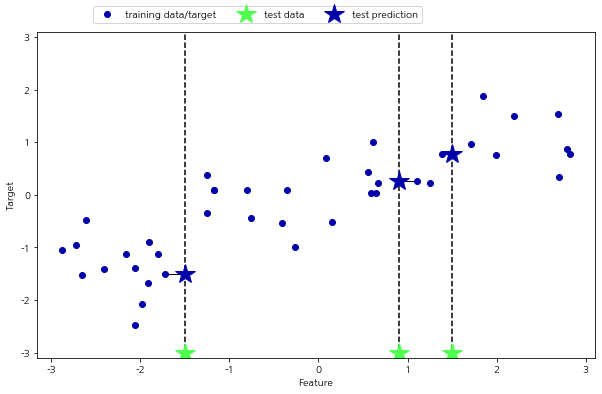

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
# 녹색별 : 예측값 

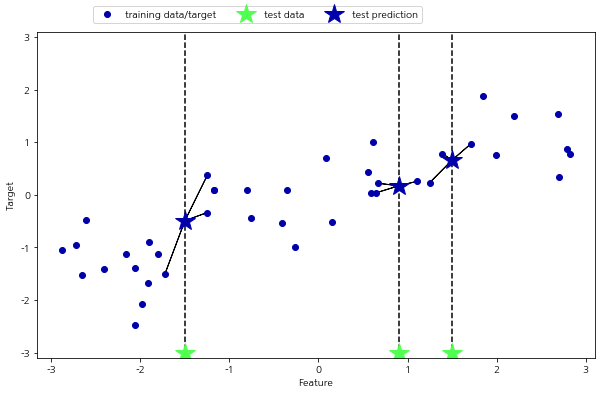

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print('테스트 세트 예측 : \n', reg.predict(X_test))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [42]:
# R2(결정계수) = 설명계수
# R2 = 1 - (타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합
print('테스트 세트 R2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R2 : 0.83


In [43]:
# 장점 : 이해하기 쉽다.
# 단점 : 예측이 늦고 능력이 떨어진다. -> 현업에서 사용하지 않는다
# 여러 알고리즘을 돌려서 결정력, 설명력이 좋은 것을 설정.

In [44]:
# test = train 예측 스코어가 비슷하면,
# 과대적합 가능성 X , but 과소적합 가능성 O
# 즉, 일반화가 되어 있지 X

### 선형모델

w[0]: 0.393906  b: -0.031804


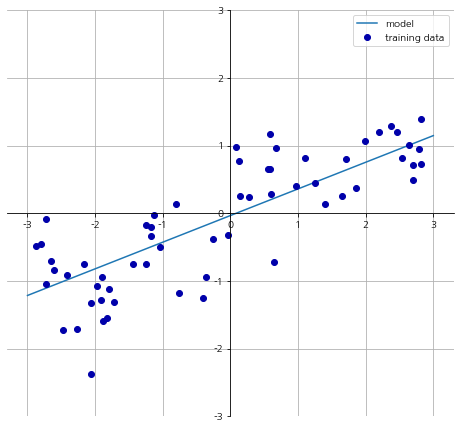

In [45]:
mglearn.plots.plot_linear_regression_wave() # 파라미터X(단순, 장점) -> 제어하는게 없다(단점)

In [46]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [47]:
# 기울기(w), 가중치(weight), 계수(coefficient) : lr.coef_
# 편향(bias, offset), 절편 : lr.intercept_ 
print('lr.coef_ : {}'.format(lr.coef_))           # 특성의 수만큼 나옴
print('lr.intercept_ : {}'.format(lr.intercept_)) # 실수 값, 하나만 준다.
# wave은 하나의 특성만 가지는 dataset. -> 그래서 coef_가 1개만 나옴.
# 그래프를 보여주기 위해서 만든 것.
# 사이킷런에서 유도된 변수는 변수명 뒤에 _를 붙임

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [48]:
print('훈련 데이터의 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.67
테스트 데이터의 점수 : 0.66


- R2값이 0.66이면 좋은 결과가 아니다.
- 훈련 세트와 테스트 세트의 점수가 매우 비슷하다. 이건 과대적합이 아니라 과소적합인 상태를 의미한다.
- 특성이 적은 선형 모델은 과대적합을 필요은 없다. 단 특성이 많은 데이터셋에서 선형 모델의 성능이 매우 높아져서 과대적합이 될 가능성이 높다.
-  ( 각각의 특성이 서로 밀접하지 않을 때 ) - data가 많을 수록 좋다.

In [49]:
# 보스턴 주택가격 데이터셋, 1970년대 주택 평균 가격을 예측한 것이다.
from sklearn.datasets import load_boston
boston = load_boston()
print('boston.shape : {}'.format(boston.data.shape))

boston.shape : (506, 13)


In [50]:
# 특성 공학 : Feature Engineering
# 특성을 유도해내는 것을 말한다.
X, y = mglearn.datasets.load_extended_boston() # 13개를 104로 늘렸다.
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [52]:
print('훈련 데이터의 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.2f}'.format(lr.score(X_test, y_test)))
# 학습은 최적화, test 적응 X -> 과대적합

훈련 데이터의 점수 : 0.95
테스트 데이터의 점수 : 0.61


- 훈련데이터와 테스트데이터의 성능 차이는 모델이 과대적합되었다는 확실한 신호이다. 따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.
- Ridge regression(릿지 회귀) - (L2 규제 - 패널티, 평균제곱오차)와 Lasso regression(라쏘 회귀) - (L1 규제 - 패널티, 기울기의 절대값) 사용

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련데이터의 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트데이터의 점수 : {:.2f}".format(ridge.score(X_test, y_test)))
# train, test gap 크지 않다. -> 과대적합이긴하지만 규제로 인해 gap이 작아졌다.
# 어느정도 일반화가 되긴 했지만 마음에 들지 않는다 -> 가중치를 0으로 가깝게 한다.

훈련데이터의 점수 : 0.89
테스트데이터의 점수 : 0.75


In [54]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련데이터의 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트데이터의 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련데이터의 점수 : 0.79
테스트데이터의 점수 : 0.64


In [55]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련데이터의 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트데이터의 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
# alpha 값을 낮춘다는 뜻은 규제를 풀어준다.-> train 점수 상승, train과 test gap 상승

훈련데이터의 점수 : 0.93
테스트데이터의 점수 : 0.77


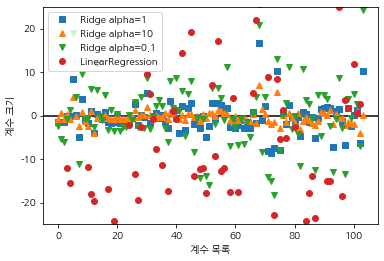

In [56]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [57]:
# 10정도 되야 일반화 되었다고 할 수 있다.(선과 거의 비슷한 위치에 있는 것)

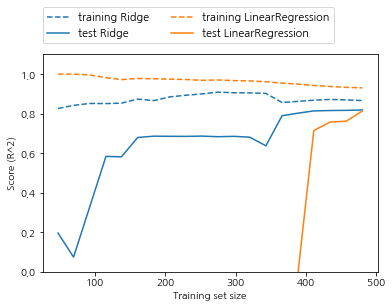

In [58]:
# 학습곡선(learning curve) : 훈련과정을 여러번 반복하면서 학습한 알고리즘에서 
#                            반복 횟수에 따른 성능변화를 보여주는 그래프
mglearn.plots.plot_ridge_n_samples()
# test 는 ridge가 더 높음
# 선형회귀는 400 밑으로는 학습하지 못한다.
# data가 충분히 있다면 규제라는 것은 중요하지 않을 수 있다.

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련세트 점수: 0.29
테스트세트 점수: 0.21
사용한 특성의 개수: 4


- 훈련데이터와 테스트데이터 모두 결과가 좋지 않다.
- 이것은 과소적합이며 104개의 특성중 4개만 사용한 것이다.
- Lasso도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수
- Lasso는 L1, L2 규제를 함께 쓰는 엘라스틱넷 방식에서 L2 규제가 빠진것이며 Lasso의 alpha 매개변수 R은 엘라스틱넷 패키지인 glmnet의 lambda 매개변수와 같은 의미.

In [60]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련데이터 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("데스트데이터 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso001.coef_ != 0)))
# 모델의 복잡도 증가.

훈련데이터 점수 : 0.90
데스트데이터 점수 : 0.77
사용한 특성의 개수 : 33


In [61]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("데스트데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso00001.coef_ != 0)))

훈련데이터 점수 : 0.95
데스트데이터 점수 : 0.64
사용한 특성의 개수 : 96


Text(0, 0.5, '계수 크기')

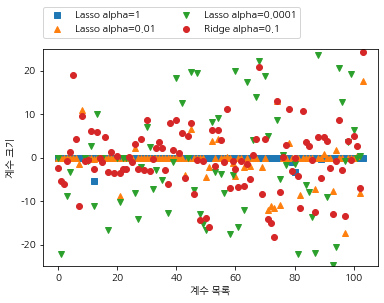

In [62]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

In [63]:
# 라쏘는 일부의 특성만 분석 할 때 사용.
# 릿지는 라쏘 이외 일때 사용.
# 대부분 릿지를 많이 사용.

In [64]:
# 로지스틱 회귀는 회귀가 아니고 분류 모델이다.
# 선형 회귀 와 로지스틱 회귀는 다른거다 헷갈리지X

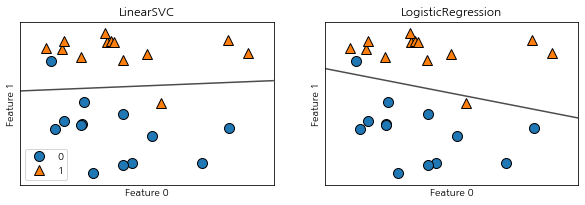

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

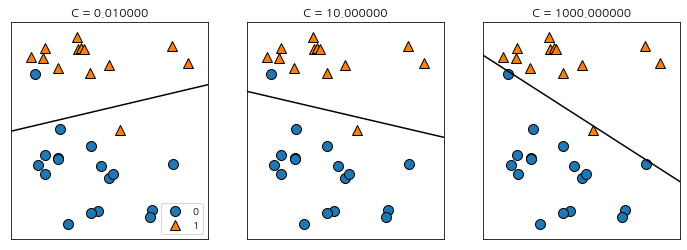

In [66]:
mglearn.plots.plot_linear_svc_regularization()

#### 그림 순서 1, 2, 3
- 왼쪽에 c 값이 가장 낮다(데이터 포이트중 다수에 맞추려고 한다.)
- c값이 작으면 규제가 많이 적용되어 있는 것이다. 그래서 경계선이 수평에 가깝다.
- 2번 그림은 c값이 1번 그림 보다 조금 크다. 잘못 분류된 두 샘플에 민감해져 결정 경계가 약간 기울어 졌다.
- 3번 그림은 c값이 가장 크다 (각각의 데이터 샘플에 정확히 분류하려는 노력을 한다) 클래스 1은 완벽히 분류 했지만 여전히 잘못 분류된 샘플이 있다.
- 두 클래스의 결정경계선이 두 클래스의 면적이 차이가 많다 (과대적합된것 같다) 

In [72]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [73]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


In [74]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


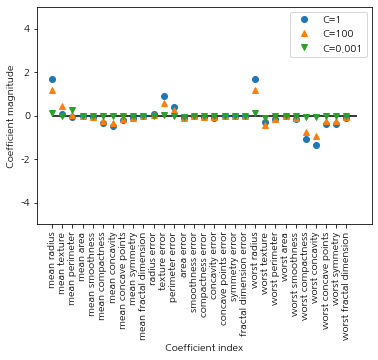

In [75]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

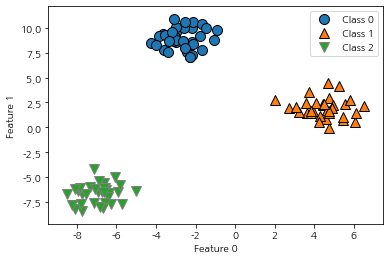

In [76]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [77]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


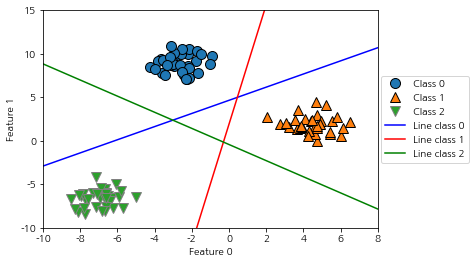

In [82]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

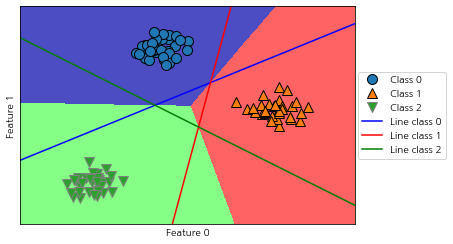

In [83]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [84]:
# Naive Bayes Classifiers -> 훈련속도는 빠르나 일반화가 느리다.

X = np.array([[0, 1, 0, 1],  # 1아닌 개수 2개
              [1, 0, 1, 1],  # 1아닌 개수 1개
              [0, 0, 0, 1],
              [1, 0, 1, 0]]) # data
y = np.array([0, 1, 0, 1]) # 라벨이라고 보면 됨.

In [86]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
